<a href="https://colab.research.google.com/github/jeniferGoncalvesDaSilvaDev/LH_CD_Jenifer_Gon-alves_da_Silva/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_LH_CD_Jenifer_Gon%C3%A7alves_da_silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np

Ler e carregar o dataset

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Lighthouse/[LH 2025-3] Desafio de Ciência de Dados/teste_indicium_precificacao.csv")
print(df)

             id                                               nome   host_id  \
0          2595                              Skylit Midtown Castle      2845   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
2          3831                    Cozy Entire Floor of Brownstone      4869   
3          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
4          5099          Large Cozy 1 BR Apartment In Midtown East      7322   
...         ...                                                ...       ...   
48889  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48890  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48891  36485431            Sunny Studio at Historical Neighborhood  23492952   
48892  36485609               43rd St. Time Square-cozy single bed  30985759   
48893  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name bairro_group      

Limpeza de dados: verificar valores nulos e duplicados

In [36]:
valores_nulos= df.isnull().sum()
print(valores_nulos)

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


In [37]:
df2 = df.dropna()
valores_nulos2 = df2.isnull().sum()
print(valores_nulos2)

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


In [38]:


# Encontre valores nulos baseados em linhas
duplicates = df2[df2.duplicated(keep=False)]

if not duplicates.empty:
    print("Linhas duplicadas encontradas:")
    print(duplicates)
else:
    print("Nenhuma linha duplicada encontrada")

Nenhuma linha duplicada encontrada


Fazendo uma descrição simples da tabela

In [39]:
df2.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,3.882000e+04,3.882000e+04,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000
mean,1.810127e+07,6.424747e+07,40.728131,-73.951148,142.332354,5.869346,29.290778,1.373259,5.166589,114.879856
std,1.069347e+07,7.589779e+07,0.054990,0.046693,196.997290,17.389233,48.183410,1.680339,26.303293,129.525398
min,2.595000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.722029e+06,7.032517e+06,40.688640,-73.982462,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887339e+07,2.837143e+07,40.721710,-73.954805,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756792e+07,1.019092e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38820 entries, 0 to 48851
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             38820 non-null  int64  
 1   nome                           38820 non-null  object 
 2   host_id                        38820 non-null  int64  
 3   host_name                      38820 non-null  object 
 4   bairro_group                   38820 non-null  object 
 5   bairro                         38820 non-null  object 
 6   latitude                       38820 non-null  float64
 7   longitude                      38820 non-null  float64
 8   room_type                      38820 non-null  object 
 9   price                          38820 non-null  int64  
 10  minimo_noites                  38820 non-null  int64  
 11  numero_de_reviews              38820 non-null  int64  
 12  ultima_review                  38820 non-null  obje

Tratamento de dados

In [41]:
data= df2['ultima_review']
print(data)

0        2019-05-21
2        2019-07-05
3        2018-11-19
4        2019-06-22
5        2017-10-05
            ...    
48781    2019-07-07
48789    2019-07-07
48798    2019-07-07
48804    2019-07-07
48851    2019-07-08
Name: ultima_review, Length: 38820, dtype: object


In [42]:

# Convertendo a coluna 'ultima_review' para datetime
df2['ultima_review'] = pd.to_datetime(df2['ultima_review'])
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38820 entries, 0 to 48851
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             38820 non-null  int64         
 1   nome                           38820 non-null  object        
 2   host_id                        38820 non-null  int64         
 3   host_name                      38820 non-null  object        
 4   bairro_group                   38820 non-null  object        
 5   bairro                         38820 non-null  object        
 6   latitude                       38820 non-null  float64       
 7   longitude                      38820 non-null  float64       
 8   room_type                      38820 non-null  object        
 9   price                          38820 non-null  int64         
 10  minimo_noites                  38820 non-null  int64         
 11  numero_de_reviews   

<ipython-input-42-fbff89cbf2bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ultima_review'] = pd.to_datetime(df2['ultima_review'])


In [43]:
data_review = df2['ultima_review']
print(data_review)
df2.shape

0       2019-05-21
2       2019-07-05
3       2018-11-19
4       2019-06-22
5       2017-10-05
           ...    
48781   2019-07-07
48789   2019-07-07
48798   2019-07-07
48804   2019-07-07
48851   2019-07-08
Name: ultima_review, Length: 38820, dtype: datetime64[ns]


(38820, 16)

Remover os outliers

In [44]:


# Define a function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Example usage for numeric columns (replace with your actual numeric columns)
numeric_columns = ['price', 'minimo_noites', 'numero_de_reviews']

for col in numeric_columns:
  if col in df2.columns:
      df2 = remove_outliers_iqr(df2, col)
      print(f"Outliers removed from column '{col}'")
  else:
      print(f"Column '{col}' not found in DataFrame")


df2

Outliers removed from column 'price'
Outliers removed from column 'minimo_noites'
Outliers removed from column 'numero_de_reviews'


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
17,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
19,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48789,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48798,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48804,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [45]:

df2.shape

(29163, 16)

EDA

                 id       host_id     latitude     longitude         price  \
count  2.916300e+04  2.916300e+04  29163.00000  29163.000000  29163.000000   
mean   1.942693e+07  6.835361e+07     40.72721    -73.948779    117.455920   
min    2.595000e+03  2.787000e+03     40.50641    -74.244420      0.000000   
25%    1.019705e+07  8.071504e+06     40.68777    -73.980840     65.000000   
50%    2.061404e+07  3.240693e+07     40.71966    -73.953040    100.000000   
75%    2.864115e+07  1.102158e+08     40.76310    -73.931595    150.000000   
max    3.645581e+07  2.738417e+08     40.91306    -73.712990    321.000000   
std    1.041893e+07  7.785070e+07      0.05659      0.048182     65.735752   

       minimo_noites  numero_de_reviews                  ultima_review  \
count   29163.000000       29163.000000                          29163   
mean        2.623015          17.999040  2018-09-12 02:10:15.492233216   
min         1.000000           1.000000            2011-03-28 00:00:00   
2

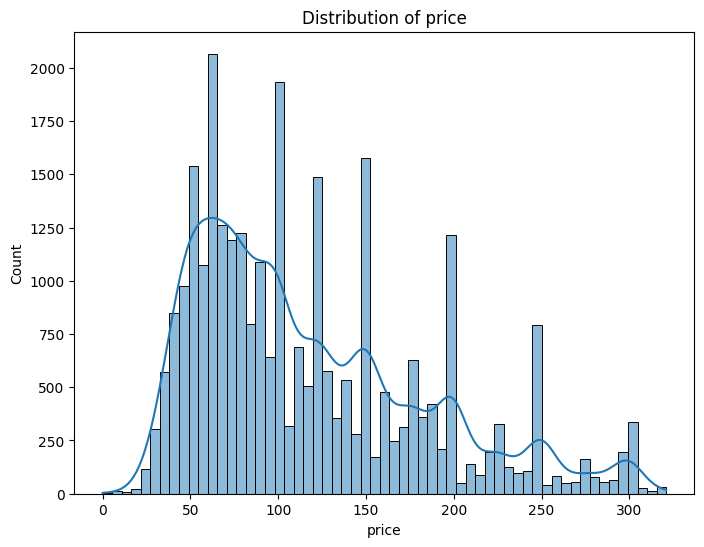

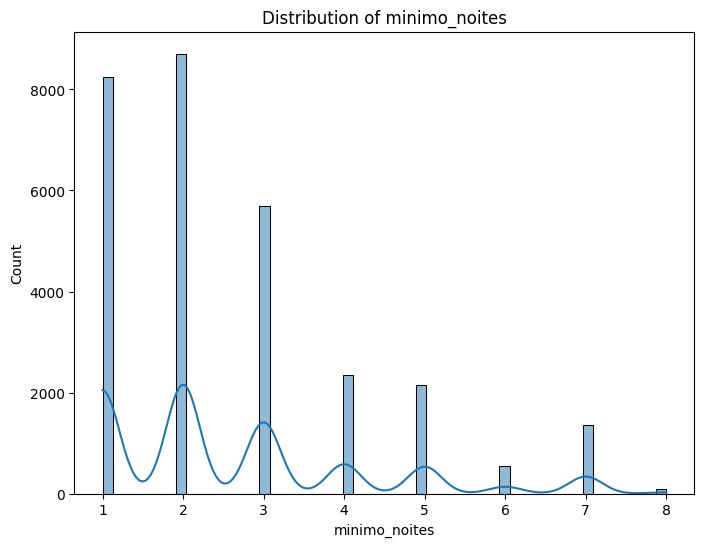

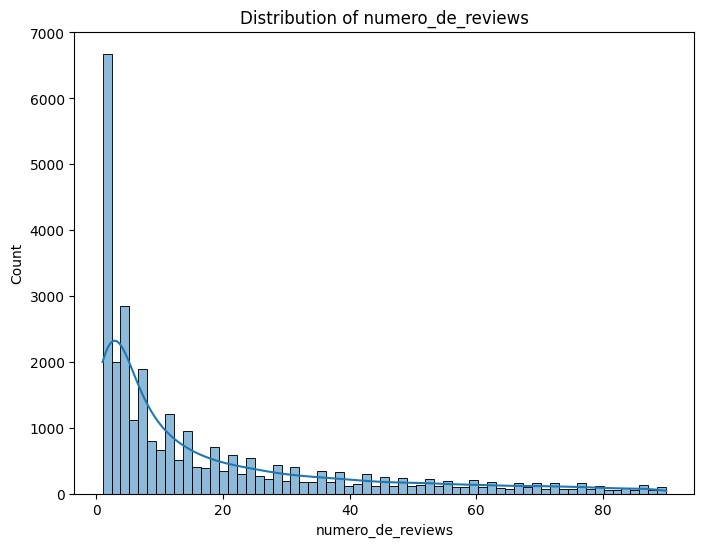

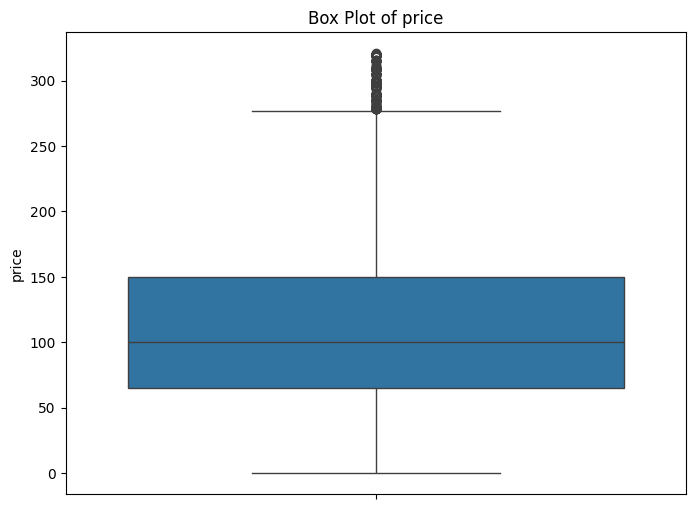

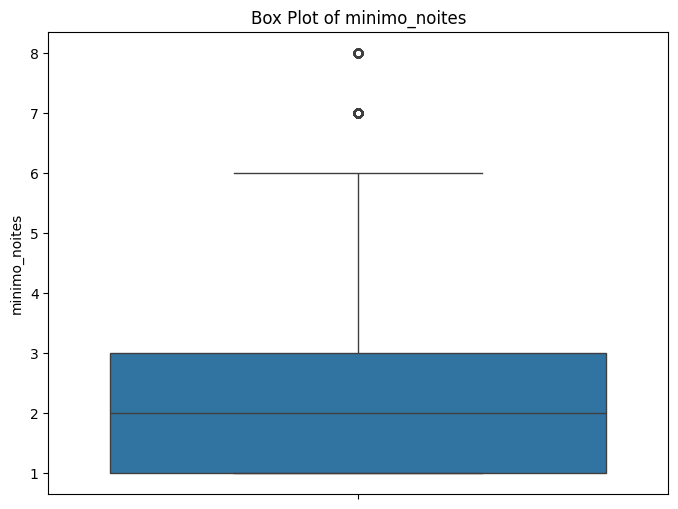

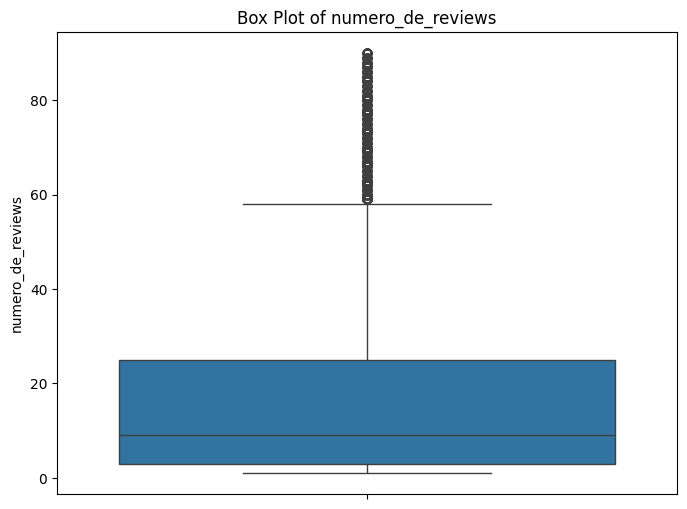

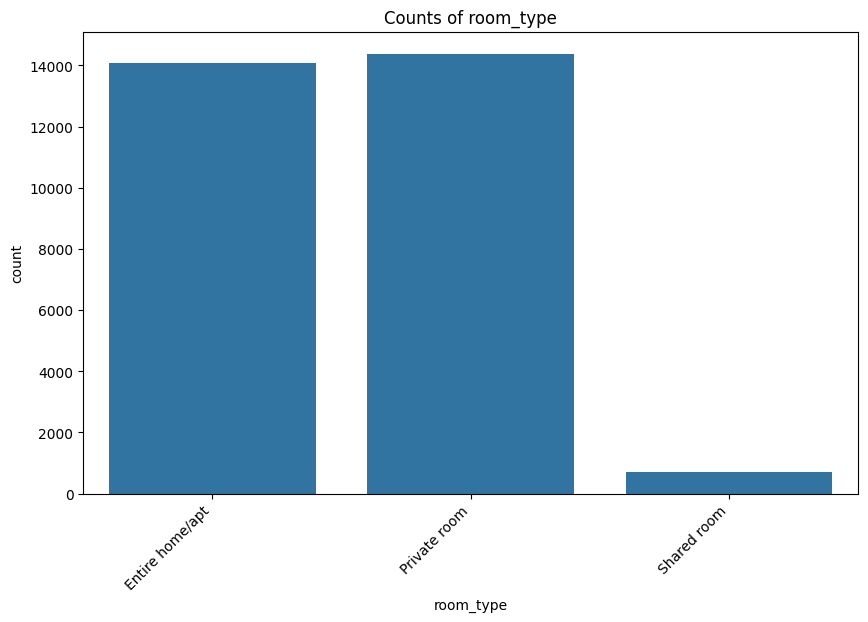

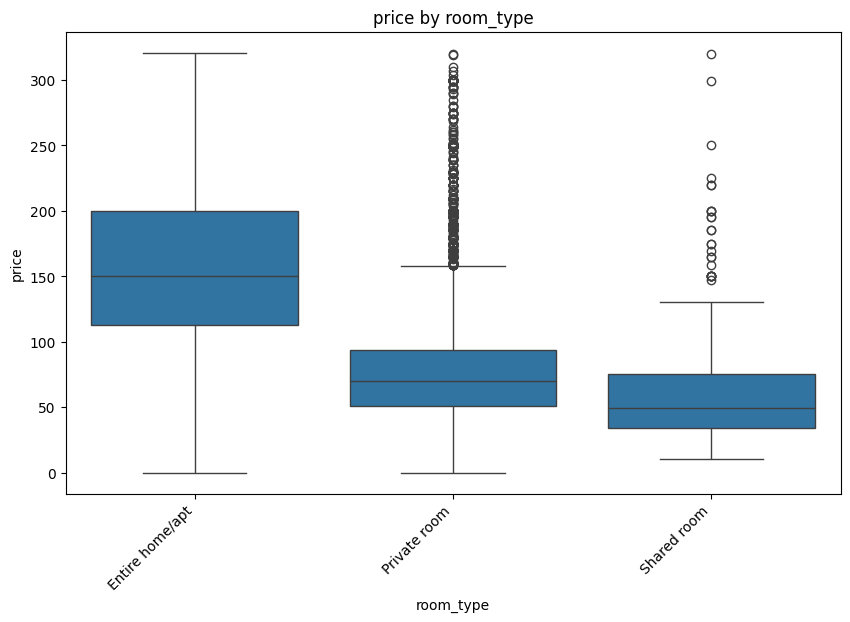

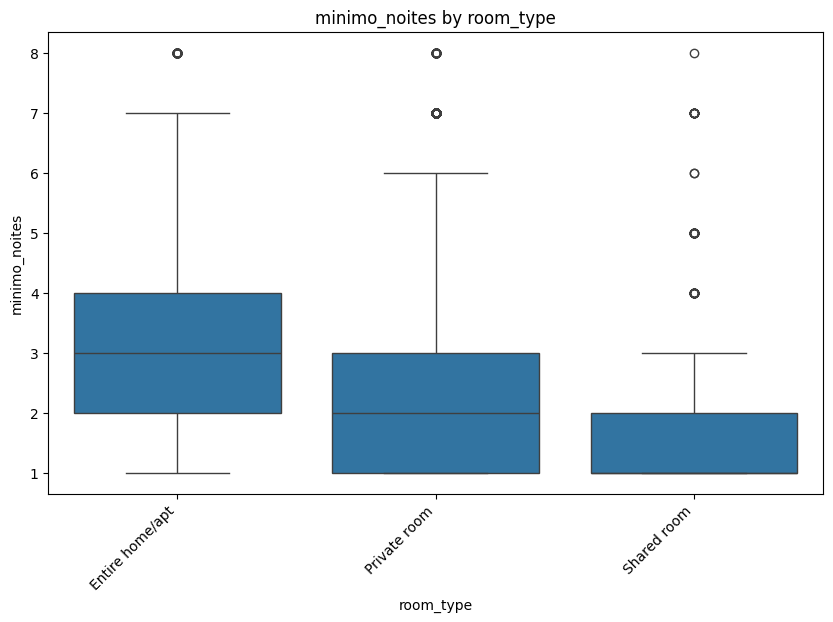

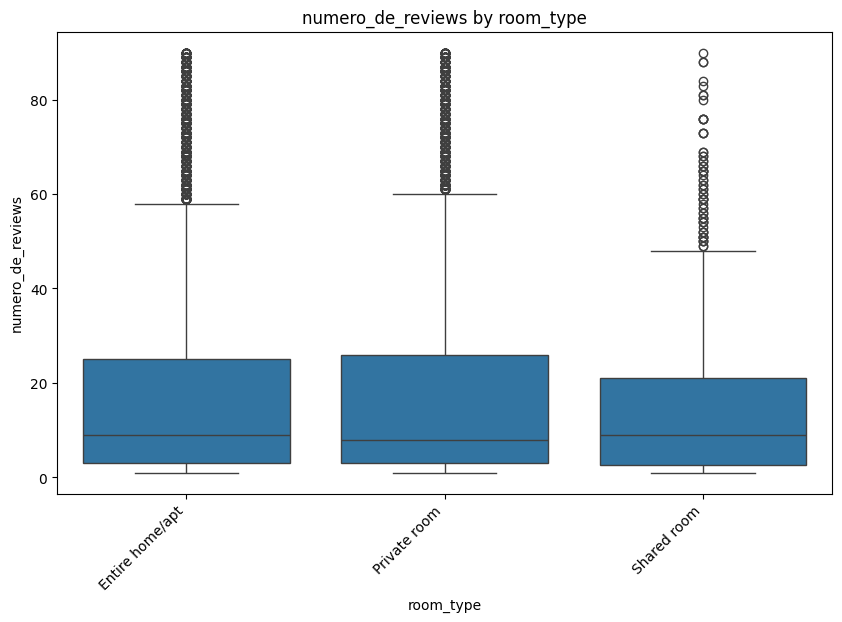

In [47]:

import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Exploratory Data Analysis

# 1. Summary Statistics
print(df2.describe())

# 2. Data Types and Missing Values
print(df2.info())

# 3. Histograms for Numerical Features
numerical_cols = ['price', 'minimo_noites', 'numero_de_reviews']
for col in numerical_cols:
    if col in df2.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df2[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# 4. Box Plots for Numerical Features
for col in numerical_cols:
    if col in df2.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df2[col])
        plt.title(f'Box Plot of {col}')
        plt.show()


# 6. Pairplot for Numerical Features (if feasible due to the number of features)
# sns.pairplot(df2[numerical_cols])
# plt.show()

# 7. Countplots for Categorical Features
categorical_cols = ['room_type', 'neighbourhood_group', 'neighbourhood'] # Add other categorical columns if needed
for col in categorical_cols:
    if col in df2.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df2)
        plt.title(f'Counts of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

# 8. Relationship between Numerical and Categorical Features
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        if num_col in df2.columns and cat_col in df2.columns:
            plt.figure(figsize=(10,6))
            sns.boxplot(x=cat_col, y=num_col, data=df2)
            plt.title(f'{num_col} by {cat_col}')
            plt.xticks(rotation=45, ha='right')
            plt.show()

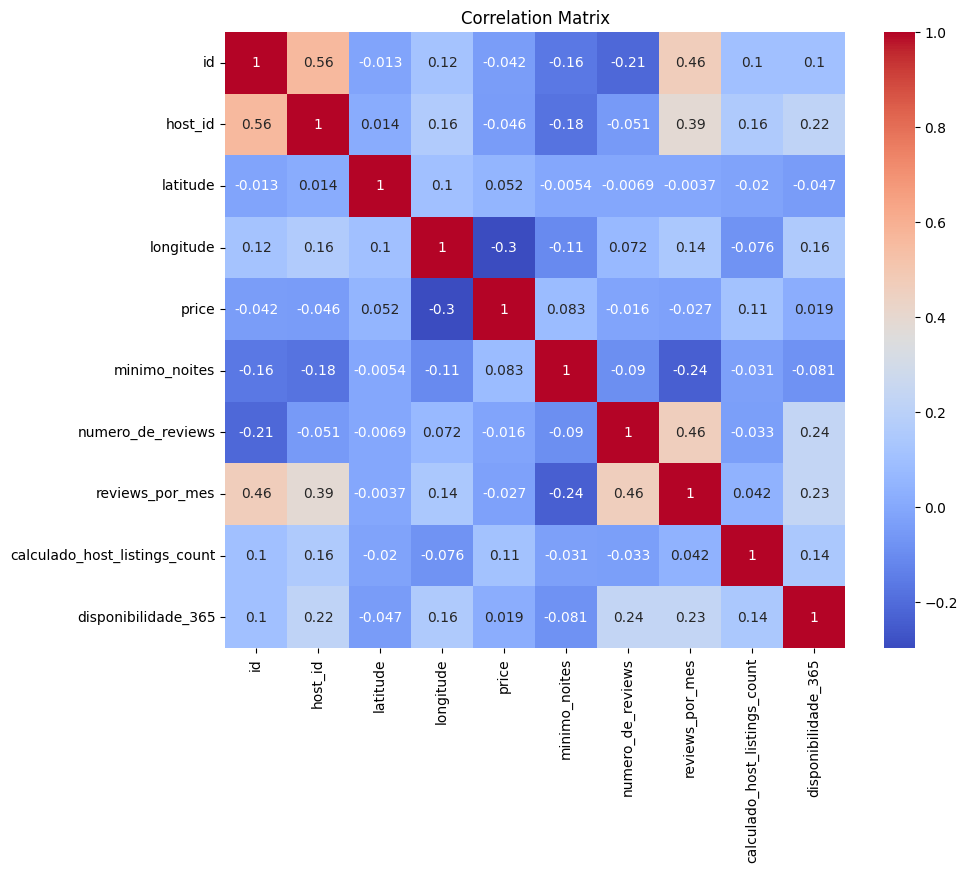

In [48]:
# 5. Correlation Matrix
correlation_matrix = df2.corr(numeric_only=True) # Add numeric_only=True
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()